# Artificial Neural Networks Approach to Track a Breast Cancer Tumor Evolution using Antenna

# Creating a Multi-output Regersor with scikit-learn (Random forest Multi-output Regersor) the first dataset (Brest_Cancer_1) 

We should draw up a quick roadmap before we start programming to keep us on course. Once we have a problem and model in mind, the following phases serve as the foundation for any machine learning approach:
1.	Ask the question and select the necessary information

2.	Setting up the environment so that each model's code can be written. Import the Skill-Learn and Keras libraries, respectively, for random forest and neural networks.Identify and correct missing data points/anomalies as required

3.	Get the information ready for the machine learning model.

4.	Use the training data to train the model.

5.	Make predictions on the test data

6.	Calculate performance metrics and compare forecasts to the targets in the known test set.

7.	If performance is subpar, modify the model, get new data, or attempt a different modeling approach.

8.	Interpret model and report results visually and numerically
Step 1 has already been completed! Can we forecast the tumor size and location? is what we're asking. And the datasets were extracted in order to achieve this purpose, as was described in the second chapter.


__Practically speaking, the machine learning process starts with gathering data for estimating the size and location of a malignant tumour in three-axis ( Tx , Ty, and Tz). As previously mentioned, this data will be extracted from electromagnetic waves received by a receiving antenna (located outside the breast), as the data includes electrical measured quantities like (Transmitted power, Gain, Radiation Efficiency)__.   

discrbtion of the dataset :
-	Transmitted power: The amplitude, intensity, or total power of a transmitted wave in relation to an incident wave is described by a transmission coefficient.

-	-Gain: The gain of a receiving antenna indicates how effectively the antenna transforms radio waves coming from a specific direction into electrical power.

-	-Radiation Efficiency: In a receiving antenna, it refers to the percentage of the radio wave's power that is actually supplied as an electrical signal after being intercepted by the antenna.


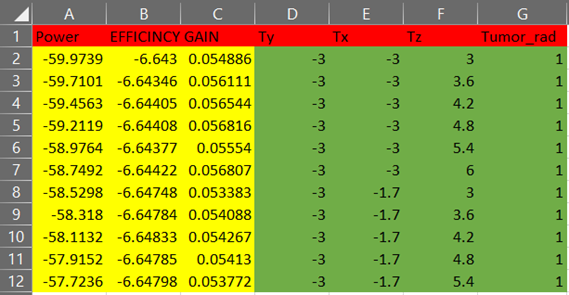

"Scikit-learn is an easy-to-use and powerful Python library for machine learning. There are a lot of decisions to make when designing and configuring your machine learning models. Most of these decisions must be resolved empirically through trial and error and by evaluating them on real data. As such, it is critically important to have a robust way to evaluate the performance of your random forest models."

# Imports:

 The first step is importing all the Python dependencies that we need. We will use three packages:
 
 1- Pandas and Numpy to read the datast and deal with it. 
 
 2- sklearn, primarily for data preprocessing related activities, and  for the multi-output regresor. From sklearn, can  import and  make  train_test_split - allowing us to split the data into a training and testing dataset. In addition, from sklearn, we will use metrics , Randomforest, and  multioutpu for performing and build our Random forest Multi-output Regersor model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as sm

2- Importing and Explore the Datasets: the next step is Importing and reading the datasets , the datasets used were saved using the CSV file, (Breast_Cancer_1)

In [3]:
data = pd.read_csv('Breast_Cancer_1.csv')

3- use the data.info() and data.head()  to give a full detail about the type of datasets used and to give a broad overview of its size in terms of the number of features and samples  

In [4]:
data.head()


,Power,EFFICINCY,GAIN,Ty,Tx,Tz,Tumor_rad
0,-59.973928,-6.643001,0.054886,-3.0,-3.0,3.0,1.0
1,-59.710135,-6.643465,0.056111,-3.0,-3.0,3.6,1.0
2,-59.456334,-6.644046,0.056544,-3.0,-3.0,4.2,1.0
3,-59.211927,-6.644083,0.056816,-3.0,-3.0,4.8,1.0
4,-58.976370,-6.643765,0.055540,-3.0,-3.0,5.4,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      973 non-null    float64
 1   EFFICINCY  973 non-null    float64
 2   GAIN       973 non-null    float64
 3   Ty         973 non-null    float64
 4   Tx         973 non-null    float64
 5   Tz         973 non-null    float64
 6   Tumor_rad  973 non-null    float64
dtypes: float64(7)
memory usage: 53.3 KB


 It can be seen from the info function print it consists of three features ( power, EFFICINCY, GAIN) and 973 samples, while there is four output targets (Tx, Ty,and Tz) , and this proves our claim. 
 Also we have 973 rows and 7 cloumns 

# Identify Anomalies/ Missing Data

Since this dataset is real-time measured data, there are not any data points that immediately appear as anomalous and no missing data in any of the measurement columns. To verify our claim, the actual codes of the null and duplicate are written and adopted.

In [7]:
print(data.duplicated().sum(0))


0


In [8]:
print(data.isnull().sum(0))

Power        0
EFFICINCY    0
GAIN         0
Ty           0
Tx           0
Tz           0
Tumor_rad    0
dtype: int64


Furthermore, by closely looking at the results, all of the data points are floats, so there is no categorical data and, therefore, no need to use one of the encoder methods.

# Features and Targets and Convert Data to Arrays

1-Now, it need to separate the data into the features and targets
2-The target, also known as the label, is the value we want to predict, in this case the actual tumor size (Tumor_rad) and its location in three coordinates (Tx, Ty,and Tz) , the last four
3- the features are all the columns the model uses to make a prediction From 0 to 3

In [14]:
# Features ( Input)
X = data.iloc[:,0:3]
print(X)

         Power  EFFICINCY      GAIN
0   -59.973928  -6.643001  0.054886
1   -59.710135  -6.643465  0.056111
2   -59.456334  -6.644046  0.056544
3   -59.211927  -6.644083  0.056816
4   -58.976370  -6.643765  0.055540
..         ...        ...       ...
968 -54.449500  -6.319471  0.056191
969 -54.317238  -6.320063  0.058205
970 -54.188383  -6.345608  0.058338
971 -54.062831  -6.344545  0.060655
972 -53.940484  -6.344943  0.060586

[973 rows x 3 columns]


In [16]:
# Targets (Output)
y = data.iloc[:,3:7]
print(y)

      Ty   Tx   Tz  Tumor_rad
0   -3.0 -3.0  3.0        1.0
1   -3.0 -3.0  3.6        1.0
2   -3.0 -3.0  4.2        1.0
3   -3.0 -3.0  4.8        1.0
4   -3.0 -3.0  5.4        1.0
..   ...  ...  ...        ...
968 -0.4  3.0  5.4        2.2
969 -0.4  3.0  6.0        2.2
970  0.9 -3.0  3.0        2.2
971  0.9 -3.0  3.6        2.2
972  0.9 -3.0  4.2        2.2

[973 rows x 4 columns]


We will also convert the Pandas data frames to Numpy arrays because that is the way the algorithm works using value

In [17]:
X = data.iloc[:,0:3].values
y = data.iloc[:,3:7].values

# Train/test split

-Sklearn allows you to manually specify the dataset to use for validation\testing during training. After generating the dataset, we must create a split between training and testing data. Scikit-learn also provides a nice function for this: train_test_split. Since both datasets are small, so in this project  we convert X and y into its training and testing components with a 90/10 train/test split 
-It is worth noting that the random state here is one of the optimization elements that can be changed randomly depending on achieving good performance of the model. According to the public domain, Random State is determined to 42 or 0


In [19]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state =42)

# Creating the Random forest multi-output regresor model

1-The next step is creating the regr_multirf model using an MultiOutputRegressor and RandomForestRegressor of the sklearn.multioutput and sklearn.ensemble respectively
2-Using n_estimators=500, this allows us to detect many patterns at firs ( The enhancement process is explained in the docummantion)) 

In [20]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=500))

# Training the model

Now it time to train data to the model and provide a few configuration options defined earlier.  All you need to do is to perform the fit method on your training set and the predict method on the test set. The model will now start training

In [21]:
regr_multirf.fit(X_train,Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=500))

# Evaluating the model

After the model is trained using both datasets , we can evaluate it using regr_multirf.predict. Based on the testing dataset, we then know how well it performs when it is used on data that it has never seen before

In [22]:
Y_pred = regr_multirf.predict(X_test)

# Model Performance Measurement

As mentioned before, Testing When you have your model trained and tuned, it is time to test its final performance. Random Forest is just another Regression algorithm, so you can use all the regression metrics to assess its result. For example, you might use MAE, MSE, MASE, RMSE, MAPE, SMAPE, and others. However, from my experience, MAE and MSE are the most commonly used. Both of them will be a good fit to evaluate the model’s performance. So, if you use them, keep in mind that the less is your error, the better and the error of the perfect model will be equal to zero. For accuracy measurements,  R^2 can be used to present the performance of the model out of 100%

In [23]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2))
print("Accuracy", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 0.6
Mean squared error = 0.91
Accuracy 0.51


Results: It is noted that the accuracy rate is low at 50 percent, which indicates that the number of features is very small to make it predict accurately. To solve this problem, the number of features has been increased to 6 , as will be shown in the other file

# Conclusion

The project findings indicate that the prediction of the size and location of the malignant tumor using the antenna technique dataset based on electromagnetic waves performs better in comparison to the other traditional techniques. The machine and deep learning algorithms are tested in Python on different sets of data to determine their accuracy and performance.
This dataset has alow accuracy, This means that the number of features must be increased to increase the performance of the model, as the number of features will be increased as in the next step

